# importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import urllib 
from urllib import request
import requests
import re
import json
import pprint as pp
import os
import random
import seaborn as sns

# explanation

- 시즌 1, 2, 4를 비교해본다.
- 시즌 1, 2의 데뷔 연습생들은 어떤 양상을 띄었고 시즌4에서 어떻게 적용할 수 있을 지 생각해본다.
- 시즌 별 ratio_sum 상위권들의 일자별 그래프를 그려본다.
    - 1차 상위권들이 2차에 남았는지, 2차 상위권들이 3차에 남았는지 (네모 3개가 이어져있는 그래프)

# reading data

In [2]:
s1 = pd.read_csv('s1_rtTotal.csv', encoding = 'cp949', index_col = 0)
s2 = pd.read_csv('s2_rtTotal.csv', encoding = 'cp949', index_col = 0)

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin' :
    rc('font', family = 'Applegothic')
elif platform.system() == 'Windows' :
    path = 'c:/Window/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else : 
    print('Unknow system') 
    
# matplotlib 한글 폰트 지원

# 상관분석

## 1차 순발식

### 시즌 1

#### 1차 순발식 순위와 1차 순발식 전 기간 동안의 검색비율의 상관관계

In [4]:
np.corrcoef(s1['rank_1st_ep5'], s1['rt01_ratio'])

array([[ 1.        , -0.53642623],
       [-0.53642623,  1.        ]])

In [5]:
out = s1[s1['rank_1st_ep5'] > 61] # 1차 순발식에서 방출된 연습생
vertical_range = out[out['rt01_ratio'] > 
                     int(s1[s1[
                              'rank_1st_ep5'] == 61 # 생존 마지막 순위
                           ]
                         ['rt01_ratio'].values)
                    ].sort_values(by = 'rt01_ratio', ascending = False).head(3) # 상위 3명
# 1차 순발식에서 방출된 연습생 중 생존 마지막 등수 연습생의 검색 ratio 보다 큰 ratio를 기록한 연습생 상위 3명
# 즉, 문 닫고 들어간 연습생보다 ratio가 높지만 탈락한 연습생들 중 상위 3명

vline = [vertical_range.index[0], 
         vertical_range.index[1], 
         vertical_range.index[2]]

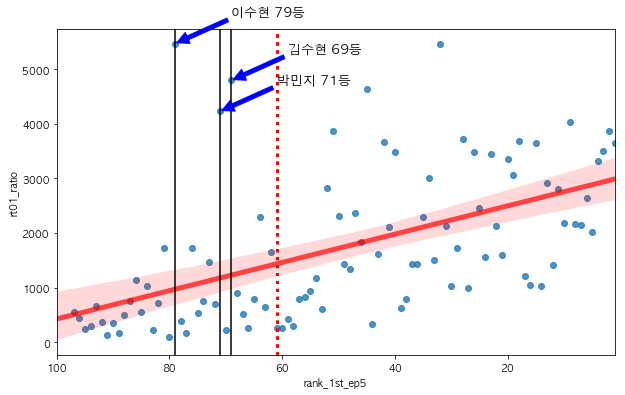

In [6]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)
plt.xlim(100, 1) 

sns.regplot(x = s1['rank_1st_ep5'] , y = s1['rt01_ratio'], line_kws = {"color":"r","alpha":0.7,"lw":5})


for each in vline:
    name = s1['name'][each]
    rank = str(s1['rank_1st_ep5'][each])
    suffix = '등'
    total = name + ' ' + rank + suffix
    
    plt.axvline(x=s1['rank_1st_ep5'][each], color='black') # ratio 상위 3명 관련 axvline
    plt.annotate(total, xy=(s1['rank_1st_ep5'][each], s1['rt01_ratio'][each]), 
                 xytext=(s1['rank_1st_ep5'][each]-10, s1['rt01_ratio'][each]+500), size=13, 
                 arrowprops=dict(color='blue', shrink=0.03))
    
    plt.axvline(x = 61, color = 'red', linestyle=':', linewidth= 3) # 1차 순발식 생존 등수
    
plt.show()

In [7]:
len(out[out['rt01_ratio'] > 
                     int(s1[s1[
                              'rank_1st_ep5'] == 61 # 생존 마지막 순위
                           ]
                         ['rt01_ratio'].values)
                    ])

28

- 상관분석을 통해 검색 ratio와 1차 순발식에서 생존은 상관이 꽤 높은 것으로 나왔다.
    - 상관계수는 0.53
- 61등의 검색 ratio보다 높지만 생존하지 못한 연습생은 28인데 그 중 상위 3명을 그래프에 표시했다.
     - 다만 이수현의 경우 동명이인으로 이수현A, B로 나뉘었는데 대중들은 검색을 이수현으로 하므로 둘의 검색 ratio가 합쳐졌고 매우 높은 ratio를 기록했다.
    - 이수현A는 탈락, 이수현B는 생존

#### 1차 순발식 등수와 최종 등수의 상관 관계

In [8]:
np.corrcoef(s1['final_rank'], s1['rank_1st_ep5'])

array([[1.        , 0.95154376],
       [0.95154376, 1.        ]])

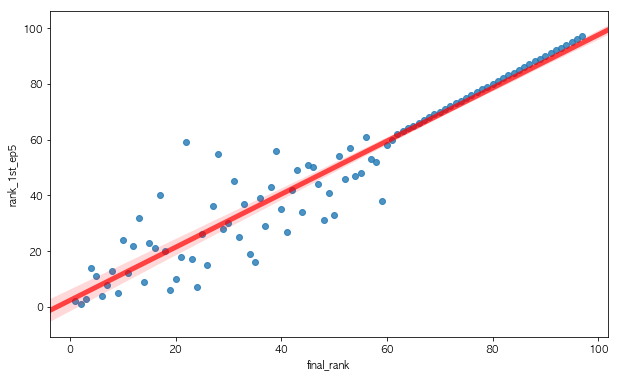

In [9]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)

sns.regplot(x = s1['final_rank'] , y = s1['rank_1st_ep5'], line_kws = {"color":"r","alpha":0.7,"lw":5})

- 1차 순발식 등수와 파이널 등수와의 상관계수는 0.9로 매우 높게 나왔다.
- 하지만 그래프를 확인해보니 60등 이후의 등수가 선형적으로 나타나는 것이 영향을 많이 끼치는 것 같아 데뷔 등수로만 비교해보았다.

In [10]:
debut = s1[s1['final_rank'] < 12]
debut_1st = s1[s1['rank_1st_ep5'] < 12]
debut_total = pd.concat([debut, debut_1st], axis = 0).drop_duplicates()

In [11]:
np.corrcoef(debut_total['final_rank'], debut_total['rank_1st_ep5'])

array([[1.        , 0.18090426],
       [0.18090426, 1.        ]])

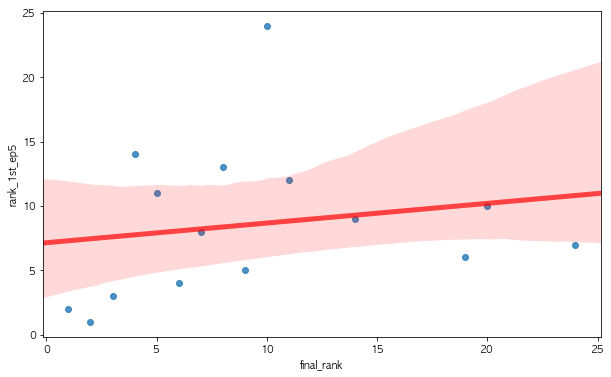

In [12]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)

sns.regplot(x = debut_total['final_rank'] ,
            y = debut_total['rank_1st_ep5'], 
            line_kws = {"color":"r","alpha":0.7,"lw":5})

- 그 결과, 1차 순발식 데뷔 등수와 최종 등수는 상관이 매우 낮은 것으로 나왔다.
- 그렇다면 1차 순발식 상위 등수와 최종 상위 등수를 비교해보자.

In [13]:
final_20 = s1[s1['final_rank'] < 20]
first_20 = s1[s1['rank_1st_ep5'] < 20]
total_20 = pd.concat([final_20, first_20], axis = 0).drop_duplicates()

In [14]:
np.corrcoef(total_20['final_rank'], total_20['rank_1st_ep5'])

array([[1.        , 0.35266508],
       [0.35266508, 1.        ]])

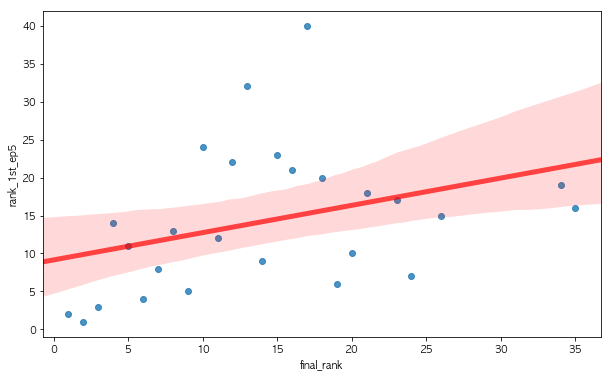

In [15]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)

sns.regplot(x = total_20['final_rank'] ,
            y = total_20['rank_1st_ep5'], 
            line_kws = {"color":"r","alpha":0.7,"lw":5})

- 데뷔 등수간 관계보다는 상관도가 조금 올라갔다.
- 따라서 1차 순발식 등수와 최종 등수의 관계에서 최상위 등수(데뷔 등수)간 상관도는 낮지만 <br>
상위 등수는 다소 상관이 있는 것으로 해석할 수 있다. 

### 시즌 2

#### 1차 순발식 순위와 1차 순발식 전 기간 동안의 검색비율의 상관관계

In [16]:
np.corrcoef(s2['rank_1st_ep5'], s2['rt01_ratio'])

array([[ 1.        , -0.69561437],
       [-0.69561437,  1.        ]])

In [17]:
out = s2[s2['rank_1st_ep5'] > 60] # 1차 순발식에서 방출된 연습생
vertical_range = out[out['rt01_ratio'] > 
                     int(s1[s1[
                              'rank_1st_ep5'] == 60 # 생존 마지막 순위
                           ]
                         ['rt01_ratio'].values)
                    ].sort_values(by = 'rt01_ratio', ascending = False).head(3) # 상위 3명
# 1차 순발식에서 방출된 연습생 중 생존 마지막 등수 연습생의 검색 ratio 보다 큰 ratio를 기록한 연습생 상위 3명
# 즉, 문 닫고 들어간 연습생보다 ratio가 높지만 탈락한 연습생들 중 상위 3명

vline = [vertical_range.index[0], 
         vertical_range.index[1], 
         vertical_range.index[2]]

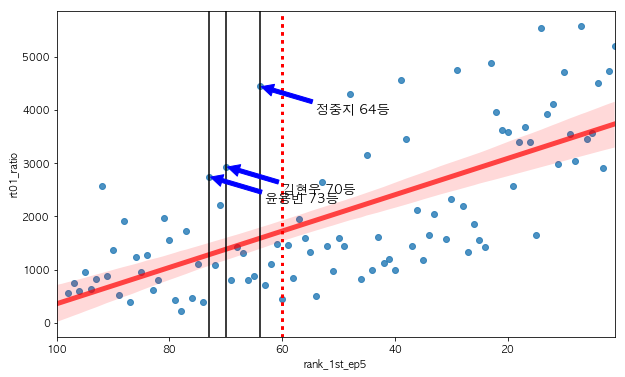

In [18]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)
plt.xlim(100, 1) 

sns.regplot(x = s2['rank_1st_ep5'] , y = s2['rt01_ratio'], line_kws = {"color":"r","alpha":0.7,"lw":5})


for each in vline:
    name = s2['name'][each]
    rank = str(s2['rank_1st_ep5'][each])
    suffix = '등'
    total = name + ' ' + rank + suffix
    
    plt.axvline(x=s2['rank_1st_ep5'][each], color='black') # ratio 상위 3명 관련 axvline
    plt.annotate(total, xy=(s2['rank_1st_ep5'][each], s2['rt01_ratio'][each]), 
                 xytext=(s2['rank_1st_ep5'][each]-10, s2['rt01_ratio'][each]-500), size=13, 
                 arrowprops=dict(color='blue', shrink=0.03))
    
    plt.axvline(x = 60, color = 'red', linestyle=':', linewidth= 3) # 1차 순발식 생존 등수
    
plt.show()

In [19]:
len(out[out['rt01_ratio'] > 
                     int(s1[s1[
                              'rank_1st_ep5'] == 61 # 생존 마지막 순위
                           ]
                         ['rt01_ratio'].values)
                    ])

37

- 상관분석을 통해 검색 ratio와 1차 순발식에서 생존은 상관이 꽤 높은 것으로 나왔다.
    - 상관계수는 0.69 (시즌1보다 조금 더 높다)
- 60등의 검색 ratio보다 높지만 생존하지 못한 연습생은 37명인데 그 중 상위 3명을 그래프에 표시했다.
     - 다만 정중지는 부정적인 논란이 있어 검색량이 많았고 탈락한 케이스

#### 1차 순발식 등수와 최종 등수의 상관관계

In [20]:
np.corrcoef(s2['final_rank'], s2['rank_1st_ep5'])

array([[1.        , 0.96532095],
       [0.96532095, 1.        ]])

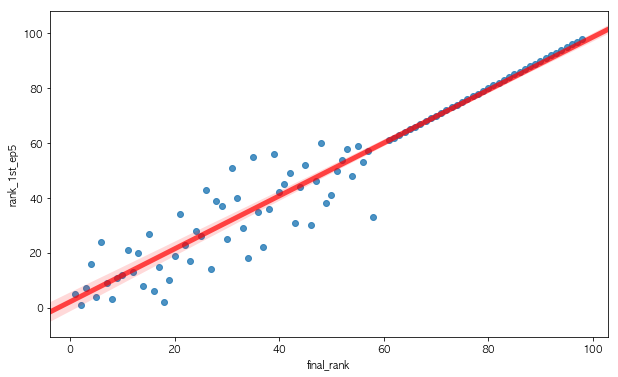

In [21]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)

sns.regplot(x = s2['final_rank'] , y = s2['rank_1st_ep5'], line_kws = {"color":"r","alpha":0.7,"lw":5})

- 시즌 1과 마찬가지로 하위 등수로 인해 상관도가 과하게 높게 나왔다.

In [22]:
debut = s2[s2['final_rank'] < 12]
debut_1st = s2[s2['rank_1st_ep5'] < 12]
debut_total = pd.concat([debut, debut_1st], axis = 0).drop_duplicates()

In [23]:
np.corrcoef(debut_total['final_rank'], debut_total['rank_1st_ep5'])

array([[ 1.        , -0.01007452],
       [-0.01007452,  1.        ]])

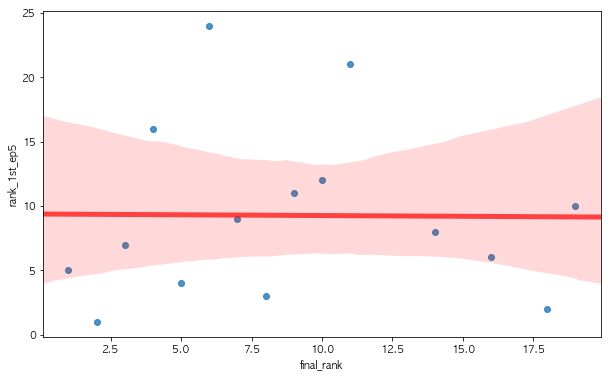

In [24]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)

sns.regplot(x = debut_total['final_rank'] ,
            y = debut_total['rank_1st_ep5'], 
            line_kws = {"color":"r","alpha":0.7,"lw":5})

- 1차 순발식의 데뷔 등수와 최종 데뷔 등수는 상관도가 매우 낮은 것으로 나왔다. 
    - 시즌 1보다 더 낮다.

In [25]:
final_20 = s2[s2['final_rank'] < 20]
first_20 = s2[s2['rank_1st_ep5'] < 20]
total_20 = pd.concat([final_20, first_20], axis = 0).drop_duplicates()

In [26]:
np.corrcoef(total_20['final_rank'], total_20['rank_1st_ep5'])

array([[1.        , 0.34546167],
       [0.34546167, 1.        ]])

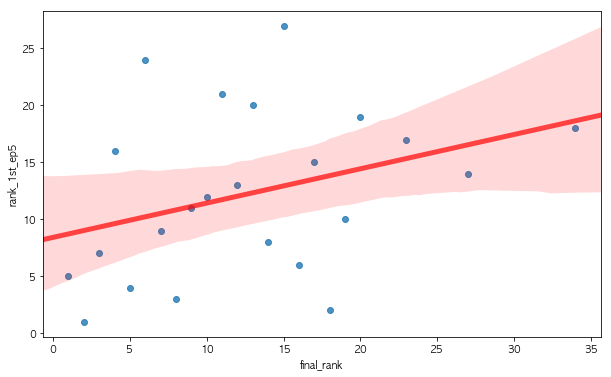

In [27]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)

sns.regplot(x = total_20['final_rank'] ,
            y = total_20['rank_1st_ep5'], 
            line_kws = {"color":"r","alpha":0.7,"lw":5})

- 시즌 1과 마찬가지로 상위 등수 (20명)간 상관도는 조금 올라갔다.

### 결론

- 1차 순발식 등수는 그 전기간 동안의 검색 ratio와 상관이 있다.
- 1차 순발식 데뷔 등수와 최종 데뷔 등수는 상관이 매우 낮지만 <br>
상위 등수간에는 다소 상관이 있는 것으로 나왔다.